In [2]:
import matplotlib.pyplot as plt
from uniswap_fee_and_divergence import *
# Show all colums of a pandas dataframe
pd.set_option('display.max_columns', None)

In [3]:
# Load data
dataset = pd.read_csv("Backtest_ready_ETHUSDT_1H.csv", index_col=0, parse_dates=True)

# Fee multiplier estimation
def estimate_conc_liq_fee_multipler(range_pct: float) -> float:
    return USD_FEE_PER_VOLUME * (6 / range_pct)

INITIAL_CAPITAL_USD = 150_000
EXCHANGE_FEE = 0.0002
IS_HEDGED = True
RANGE_PCTS = 6
# 2.01$ from $100 principal over last 10 days (May 28th - June 7th)
# Get last 10 day's cumulative volume
VOLUME_SUM = dataset["volume"]["2023-05-28":"2023-06-08"].sum() # type: ignore
USD_FEE_CAPITAL_MULTIPLIER = INITIAL_CAPITAL_USD/100
USD_FEE_PER_VOLUME = 2.01 / VOLUME_SUM
USD_FEE_PER_VOLUME = USD_FEE_PER_VOLUME * USD_FEE_CAPITAL_MULTIPLIER


Backtest results:
Initial capital: 150000 USD
Range pct: 6
Fee per volume: 1.6466573667165954e-05
Exchange fee: 0.0002
Number of positions: 130
Number of data points in backtest: 9783
Total days in backtest: 407.625
Total fees received: 190331.22009034216
Final capital: 137612.7178785382
Final ROI: -8.26%


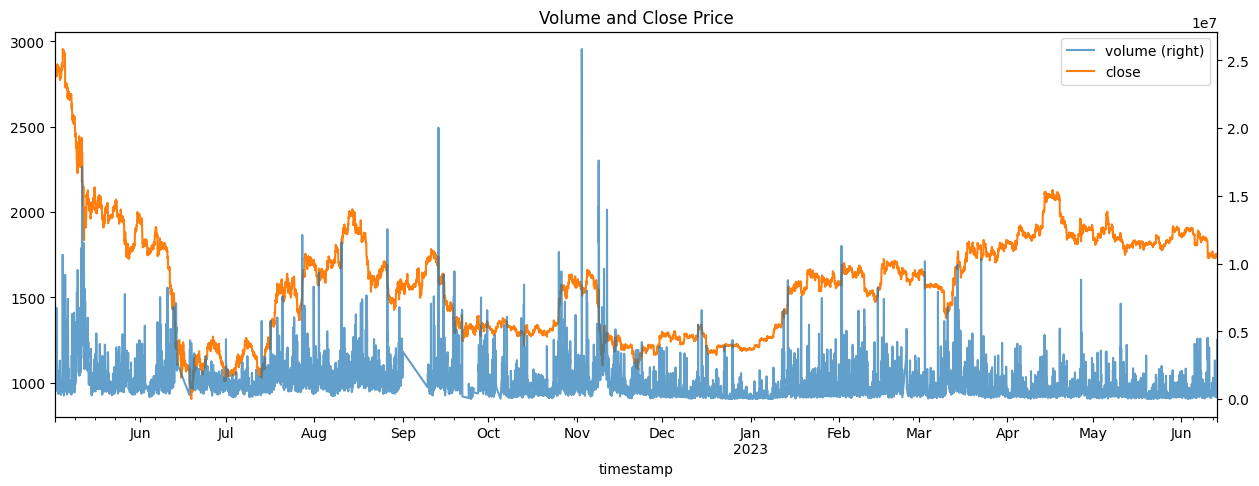

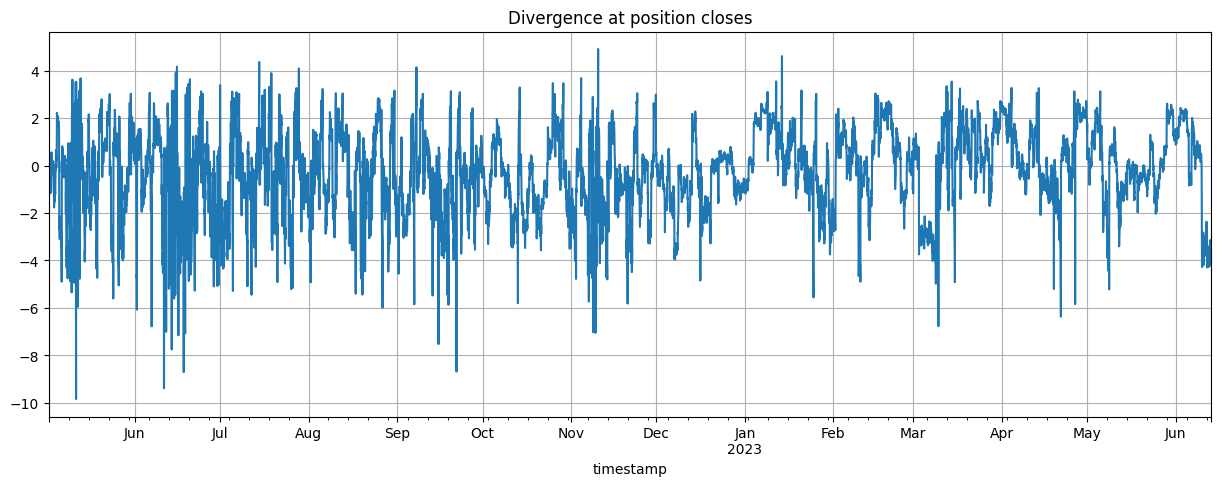

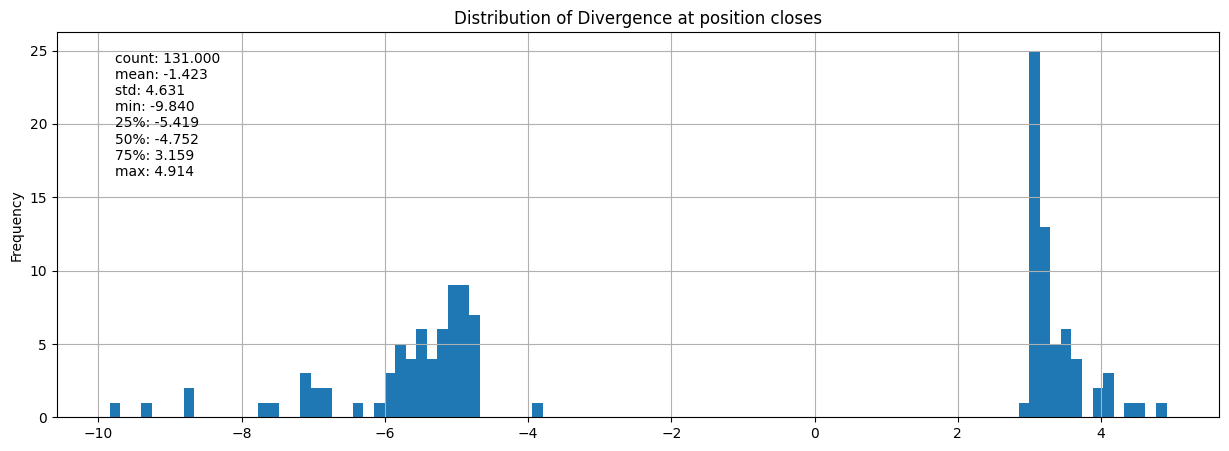

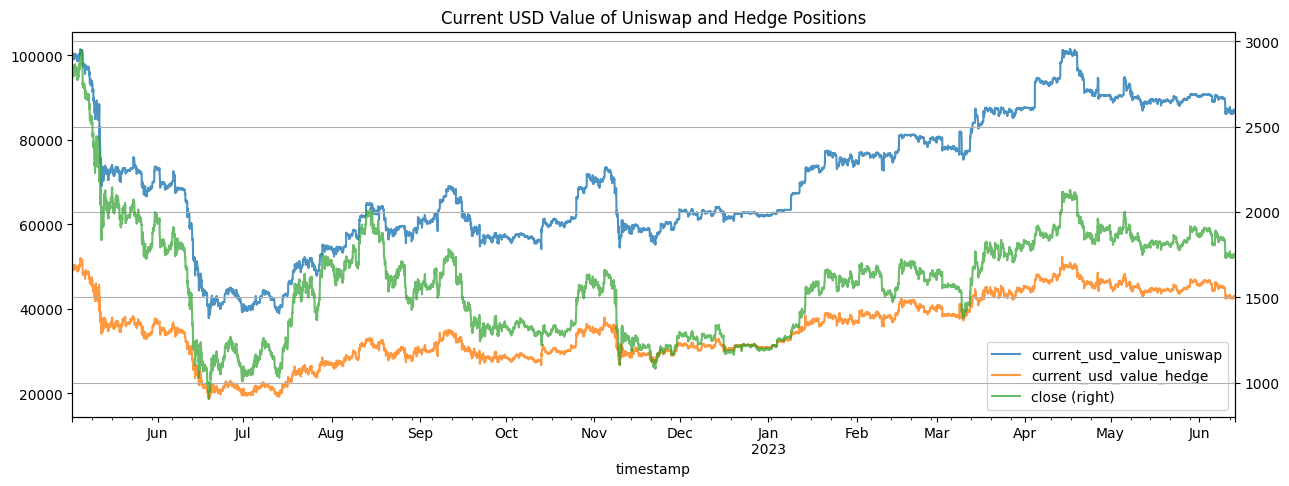

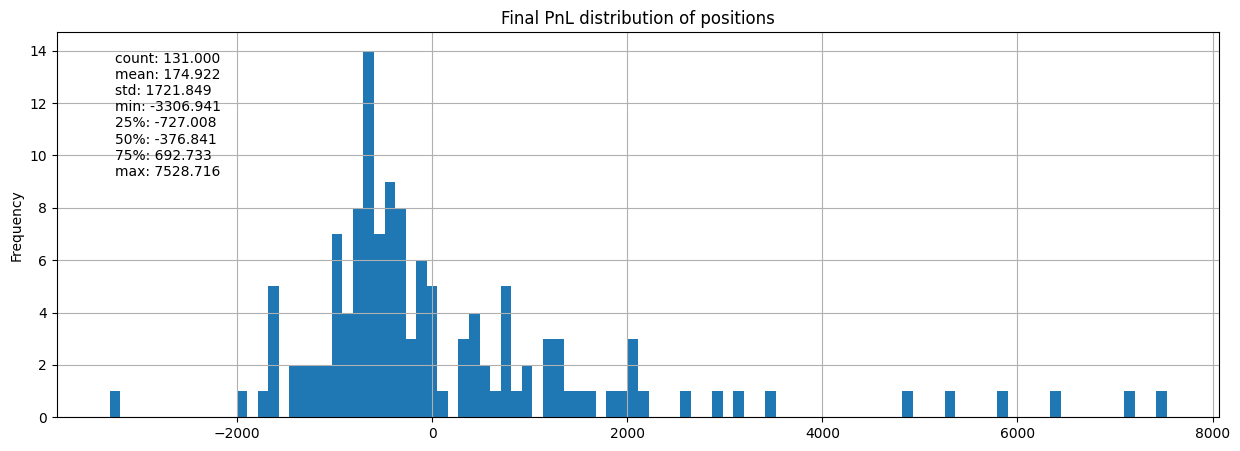

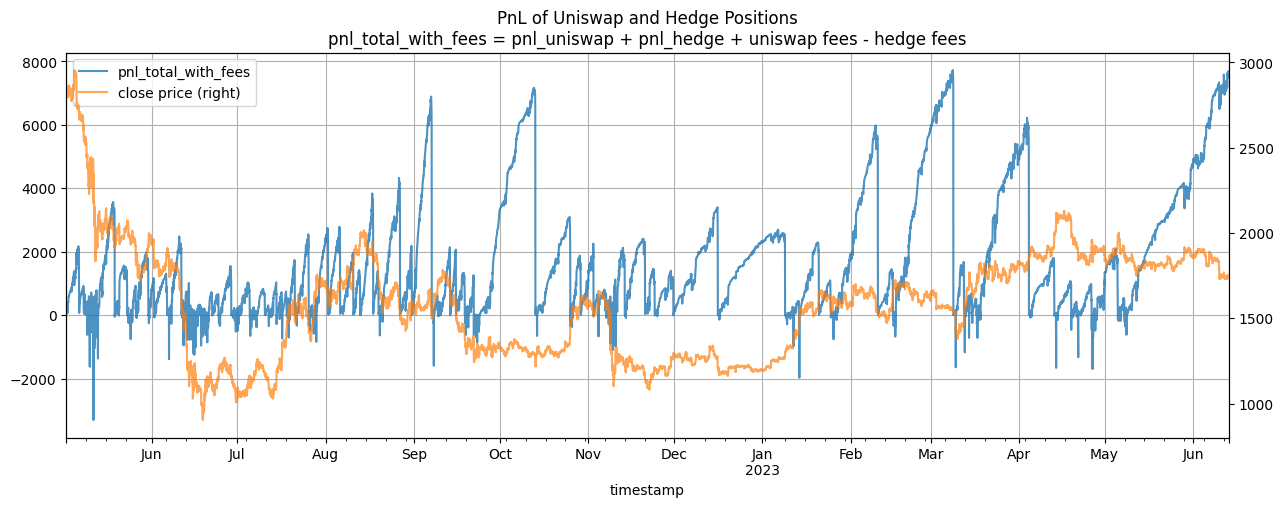

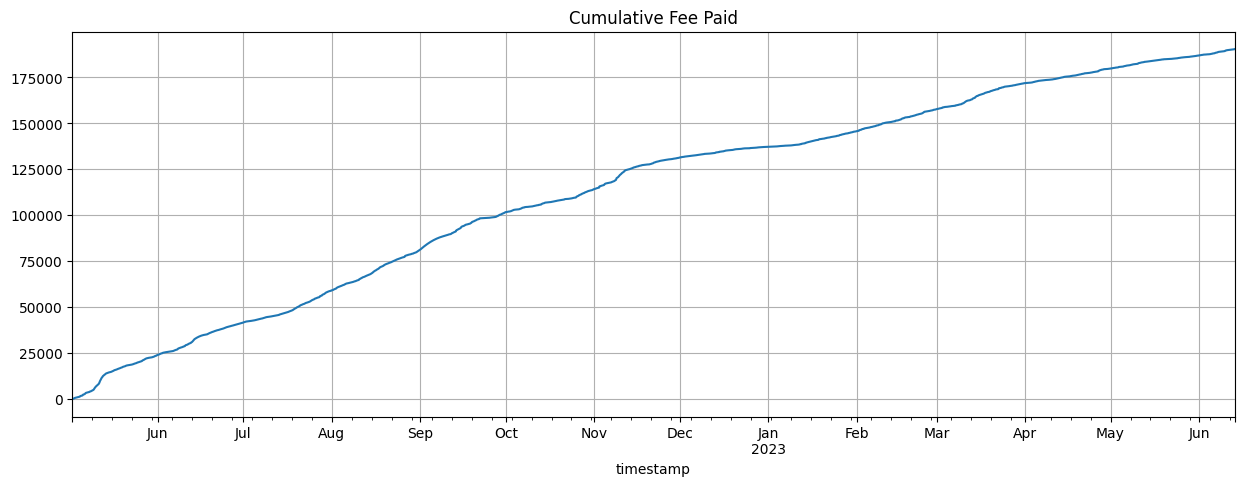

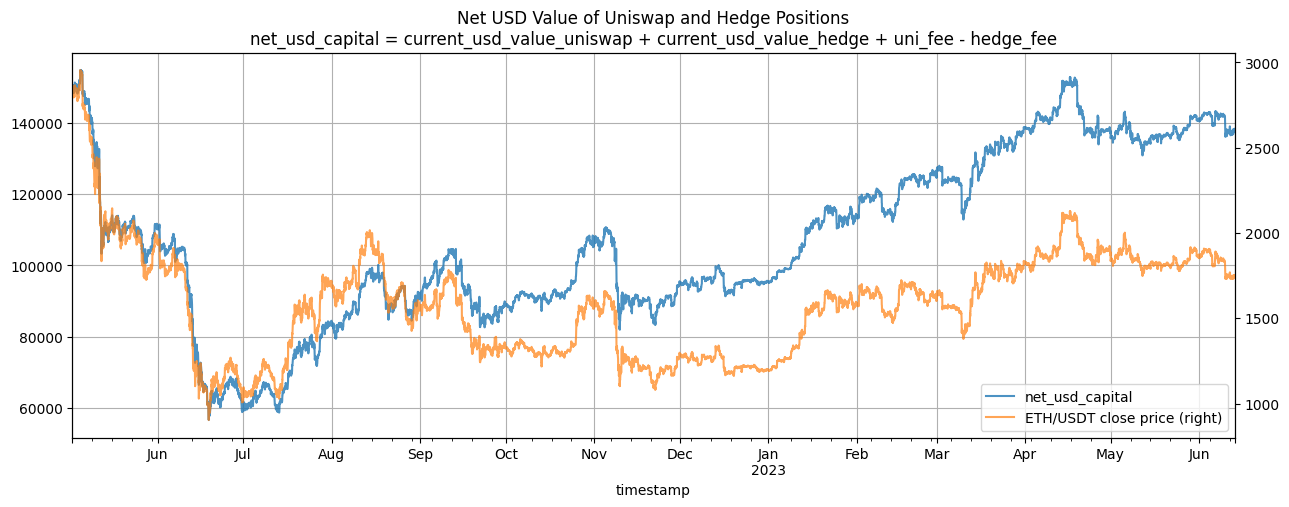

In [4]:
# Run backtest
backtester = DataBacktester(
    data=dataset, 
    capital_usd=INITIAL_CAPITAL_USD, 
    range_pct=RANGE_PCTS, 
    fee_per_volume=estimate_conc_liq_fee_multipler(RANGE_PCTS),
    exchange_fee=EXCHANGE_FEE,
    is_hedged=IS_HEDGED)

# Run backtest
backtester.run()

# Print backtest results
print(f"Backtest results:")
print(f"Initial capital: {INITIAL_CAPITAL_USD} USD")
print(f"Range pct: {backtester.range_pct}")
print(f"Fee per volume: {backtester.fee_per_volume}")
print(f"Exchange fee: {backtester.exchange_fee}")
print(f"Number of positions: {len(backtester.positions)}")
print(f"Number of data points in backtest: {len(backtester.data)}")
print(f"Total days in backtest: {len(backtester.data)/24}")
print(f"Total fees received: {backtester.backtest_df.fee.sum()}")
print(f"Final capital: {backtester.backtest_df.net_usd_capital.iloc[-1]}")
print(f"Final ROI: {round((backtester.backtest_df.net_usd_capital.iloc[-1]/INITIAL_CAPITAL_USD*100) - 100, 2)}%")
backtester.plot_backtest()

In [5]:
# Calculate diff between values of this list: backtester.backtest_df.id.unique()
print("Frequency of positions in hours")
pd.DataFrame(backtester.backtest_df.open_timestamp.unique()).diff().describe()

Frequency of positions in hours


,0
count,130
mean,2 days 20:37:23.076923076
std,4 days 05:10:16.681383776
min,0 days 01:00:00
25%,0 days 12:00:00
50%,1 days 06:00:00
75%,3 days 18:15:00
max,23 days 14:00:00
